# Content 
    ## Data preporcessing
    ## Decision tree model consturction
    ## Stastical information for Top-N feature that is greater than 0 for feature importance
    ## Visualisation topN 
    ##  Filling in zero before regression analysis
    ## Shapiro-Wilk test to conform normality for all features
    ## Regression analysis 
    ## Signifciant difference for the feature in the rank list by using Wilconx signed rank test

In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

Utility function

In [2]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


import data

In [3]:

constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'

data = pd.read_csv(constantCSVPath)


# Tranform any laughter categories,such as "[laugh]-null Discouse " into Ambiguous as the fixed version deal with this case already

# Data preporcessing

In [4]:
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'

# merge [laugh]-discourse [V] and S into [laugh]-Discourse

In [5]:
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

Verfication of annoantion type

In [6]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Discourse S',
 '[laugh]-Discourse [V]',
 '[laugh]-Mirthful'}

In [7]:
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
y_indepdent_CV_LIST_unique = list(set(y_indepdent_list))

featurelist = get_featureList_index()

X_feature = data[featurelist]

X_acuostic_feature_numpy_array = X_feature.values

Split the data

In [8]:
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'


utteranceType =     mirthfulLaugh
print("Current laughter is" + utteranceType)
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]

classNameLaughter

# Process the 'considetype' column
laughter_name_inLoop = utteranceType

X_feature_temp = X_feature
X_acuostic_feature_numpy_array = X_feature_temp.values

y_indepdent_list = y_indepdent.tolist()
# This operation make only current laughter type is 1 other type is 0
# Convert target to binary: 1 for 'mirthful', 0 for others


y_binaryOperation_Series = data[conside_column_name].apply(lambda x: utteranceType if x == laughter_name_inLoop else NotcuurentLaughter)
y_binaryOperation_list = y_binaryOperation_Series.tolist()

# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X_acuostic_feature_numpy_array, y_binaryOperation_list,
                                                        test_size=0.3, random_state=42)

Current laughter is[laugh]-Mirthful


In [9]:
#
s=1

Visalusation

In [10]:
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]
classNameLaughter

['Not [laugh]-Mirthful', '[laugh]-Mirthful']

In [11]:
specifcifclAUGHTER = data[data[conside_column_name]== utteranceType]
specifcifclAUGHTER

Session id Participant id  Start Time - ms  End Time - ms  \
349           S02           P007            69800          70000   
350           S02           P007            70000          70200   
351           S02           P007            70200          70400   
726           S02           P007           145200         145400   
727           S02           P007           145400         145600   
...           ...            ...              ...            ...   
147256        S23           P049           344000         344200   
147257        S23           P049           344200         344400   
147258        S23           P049           344400         344600   
147259        S23           P049           344600         344800   
147260        S23           P049           344800         345000   

        Duration - ms CV - merge - M - L - S concise merge type  \
349               200       [laugh]-Mirthful   [laugh]-Mirthful   
350               200       [laugh]-Mirthful   [laugh]-Mirthful   
351               200       [laugh]-Mirthful   [laugh]-Mirthful   
726               200       [laugh]-Mirthful   [laugh]-Mirthful   
727               200       [laugh]-Mirthful   [laugh]-Mirthful   
...               ...                    ...                ...   
147256            200      [laugh]-Mirthful    [laugh]-Mirthful   
147257            200      [laugh]-Mirthful    [laugh]-Mirthful   
147258            200      [laugh]-Mirthful    [laugh]-Mirthful   
147259            200      [laugh]-Mirthful    [laugh]-Mirthful   
147260            200      [laugh]-Mirthful    [laugh]-Mirthful   

        Count for the same utterance type  First time appear  \
349                                     1               True   
350                                     2              False   
351                                     3              False   
726                                     1               True   
727                                     2              False   
...                                   ...                ...   
147256                                  8              False   
147257                                  9              False   
147258                                 10              False   
147259                                 11              False   
147260                                 12              False   

        audspec_lengthL1norm_sma_range  ...  mfcc_sma_de[14]_peakRangeAbs  \
349                           0.182843  ...                      0.000000   
350                           0.034449  ...                      0.000000   
351                           0.072503  ...                      1.740585   
726                           0.050847  ...                      0.000000   
727                           3.195551  ...                      0.000000   
...                                ...  ...                           ...   
147256                        0.390663  ...                      1.767451   
147257                        0.602718  ...                      0.000000   
147258                        0.576035  ...                      0.000000   
147259                        0.876917  ...                      0.000000   
147260                        0.560718  ...                      0.000000   

        mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
349                         0.000000                     0.890849   
350                         0.000000                    -0.256877   
351                         0.425356                     0.554486   
726                         0.000000                     1.462545   
727                         0.000000                     4.375908   
...                              ...                          ...   
147256                      0.656510                    -0.046229   
147257                      0.000000                     2.213903   
147258                      0.000000                     1.738097   
1

Visulaisation duration and count

In [12]:
durationList = specifcifclAUGHTER['Duration - ms'].values.tolist()

Small sample directly training

# Decision tree model consturction

min_samples_leaf :1%-2% of total sample  = 3 to 6 around
min_samples_split : 2% - 5% : 6-15
criterion gini high demenson data
random_state=0,criterion='gini',max_depth=10,min_samples_split=10

In [13]:
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10,random_state=42,class_weight='balanced')
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
cls_accuracy = accuracy_score(y_test, y_test_pred)
print("Predication result is" +str(cls_accuracy))

Predication result is0.773396674584323


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
myreport  = classification_report(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

                      precision    recall  f1-score   support

Not [laugh]-Mirthful       0.99      0.78      0.87     43668
    [laugh]-Mirthful       0.02      0.38      0.04       537

            accuracy                           0.77     44205
           macro avg       0.51      0.58      0.46     44205
        weighted avg       0.98      0.77      0.86     44205



# Confusion matreix

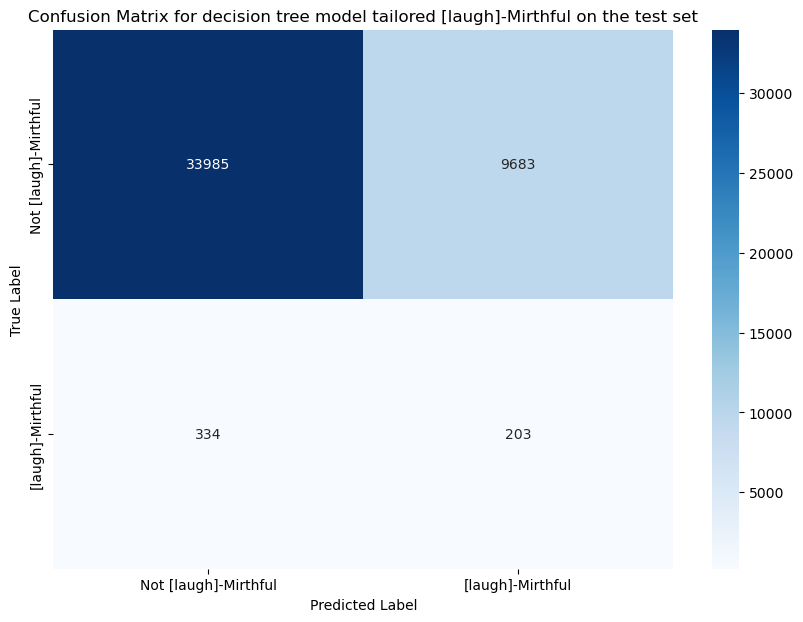

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=classNameLaughter)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classNameLaughter, yticklabels=classNameLaughter)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
title = 'Confusion Matrix for decision tree model tailored '+ utteranceType+' on the test set' 
plt.title(title)
saveName =constnatdurationPrefix+'DecisionTree-'+utteranceType+'-confusionMatrix.png'
plt.savefig(saveName)
plt.show()

In [16]:
cuurentLaughter = utteranceType
NotcuurentLaughter = 'Not '+ utteranceType
classNameLaughter = [NotcuurentLaughter,cuurentLaughter]
classNameLaughter

['Not [laugh]-Mirthful', '[laugh]-Mirthful']

In [17]:
from sklearn import tree

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=featurelist,
                                class_names=classNameLaughter,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
saveNameD = constnatdurationPrefix+'DecisionTree-'+utteranceType+'-decsion.pdf'
graph.write_pdf(saveNameD)

True

Then we need to know non-zero feature

In [18]:
feature_importances = clf.feature_importances_

    # Create a pandas series to visualize the feature importances
importances = pd.Series(feature_importances, index=X_feature.columns)
importances_sorted = importances.sort_values()
# asecnding oredr 
list_importance_value = importances_sorted.tolist()
featurelist_index_names_list = list(importances_sorted.index)

In [19]:
# https://www.geeksforgeeks.org/python-reversing-list/
# Reversing a list using slicing technique
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst
 

In [20]:
desecendingList_importanceValue = Reverse(list_importance_value)


In [21]:
featurelist_index_names_list

['audspec_lengthL1norm_sma_range',
 'audSpec_Rfilt_sma[1]_peakRangeAbs',
 'audSpec_Rfilt_sma[1]_peakDistStddev',
 'audSpec_Rfilt_sma[1]_meanPeakDist',
 'audSpec_Rfilt_sma[1]_rqmean',
 'audSpec_Rfilt_sma[1]_flatness',
 'audSpec_Rfilt_sma[1]_amean',
 'audSpec_Rfilt_sma[0]_centroid',
 'audSpec_Rfilt_sma[0]_qregerrQ',
 'audSpec_Rfilt_sma[0]_qregc3',
 'audSpec_Rfilt_sma[1]_peakRangeRel',
 'audSpec_Rfilt_sma[0]_qregc2',
 'audSpec_Rfilt_sma[0]_linregerrQ',
 'audSpec_Rfilt_sma[0]_linregc2',
 'audSpec_Rfilt_sma[0]_linregc1',
 'audSpec_Rfilt_sma[0]_stddevFallingSlope',
 'audSpec_Rfilt_sma[0]_meanFallingSlope',
 'audSpec_Rfilt_sma[0]_stddevRisingSlope',
 'audSpec_Rfilt_sma[0]_meanRisingSlope',
 'audSpec_Rfilt_sma[0]_minRangeRel',
 'audSpec_Rfilt_sma[0]_peakMeanRel',
 'audSpec_Rfilt_sma[0]_qregc1',
 'audSpec_Rfilt_sma[1]_peakMeanAbs',
 'audSpec_Rfilt_sma[1]_peakMeanMeanDist',
 'audSpec_Rfilt_sma[1]_peakMeanRel',
 'audSpec_Rfilt_sma[2]_peakMeanAbs',
 'audSpec_Rfilt_sma[2]_peakRangeRel',
 'audSpec_R

In [22]:
desecendingList_importanceName = Reverse(featurelist_index_names_list)
desecendingList_importanceName

['pcm_fftMag_spectralFlux_sma_stddev',
 'mfcc_sma[2]_amean',
 'F0final_sma_quartile1',
 'audSpec_Rfilt_sma_de[3]_stddev',
 'audSpec_Rfilt_sma_de[4]_rqmean',
 'pcm_fftMag_spectralVariance_sma_quartile1',
 'audSpec_Rfilt_sma_de[6]_rqmean',
 'audSpec_Rfilt_sma_de[5]_minSegLen',
 'audSpec_Rfilt_sma_de[5]_percentile99.0',
 'audSpec_Rfilt_sma_de[5]_pctlrange0-1',
 'audSpec_Rfilt_sma_de[5]_stddev',
 'audSpec_Rfilt_sma_de[5]_skewness',
 'audSpec_Rfilt_sma_de[5]_kurtosis',
 'audSpec_Rfilt_sma_de[5]_meanSegLen',
 'audSpec_Rfilt_sma_de[5]_maxSegLen',
 'mfcc_sma_de[14]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[5]_segLenStddev',
 'audSpec_Rfilt_sma_de[5]_iqr1-3',
 'audSpec_Rfilt_sma_de[5]_upleveltime25',
 'audSpec_Rfilt_sma_de[5]_upleveltime50',
 'audSpec_Rfilt_sma_de[5]_upleveltime75',
 'audSpec_Rfilt_sma_de[5]_upleveltime90',
 'audSpec_Rfilt_sma_de[5]_risetime',
 'audSpec_Rfilt_sma_de[5]_leftctime',
 'audSpec_Rfilt_sma_de[5]_lpgain',
 'audSpec_Rfilt_sma_de[5]_lpc0',
 'audSpec_Rfilt_sma_de[5]_pe

In [23]:
# Construct the DataFrame
importanceFeatureDF_present = pd.DataFrame(desecendingList_importanceValue, index=desecendingList_importanceName, columns=['Feature importance value'])


In [24]:
topTenFeatureFeature = importanceFeatureDF_present.head(10)
topTenFeatureFeature
saveName = constnatdurationPrefix+utteranceType+"-top10Row.csv"
topTenFeatureFeature.to_csv(saveName, index=True)


In [25]:
topTenFeatureFeature

Feature importance value
pcm_fftMag_spectralFlux_sma_stddev                         0.375858
mfcc_sma[2]_amean                                          0.155032
F0final_sma_quartile1                                      0.139335
audSpec_Rfilt_sma_de[3]_stddev                             0.102038
audSpec_Rfilt_sma_de[4]_rqmean                             0.096208
pcm_fftMag_spectralVariance_sma_quartile1                  0.076487
audSpec_Rfilt_sma_de[6]_rqmean                             0.055042
audSpec_Rfilt_sma_de[5]_minSegLen                          0.000000
audSpec_Rfilt_sma_de[5]_percentile99.0                     0.000000
audSpec_Rfilt_sma_de[5]_pctlrange0-1                       0.000000

In [26]:
greater_zero_featureValue = [value for value in desecendingList_importanceValue if value > 0.0]

In [27]:
sizeOfGreaterFeature = len(greater_zero_featureValue)
sizeOfGreaterFeature

7

In [28]:
featureNameTopN = desecendingList_importanceName[0:sizeOfGreaterFeature]

In [29]:
# TOPN feature N
featureNameTopN
greater_zero_featureValue

[0.3758576880109889,
 0.15503237111401652,
 0.13933450698293975,
 0.10203795926211644,
 0.09620835884885415,
 0.07648693185404619,
 0.055042183927038094]

# Stastical information for Top-N feature that is greater than 0 for feature importance

In [30]:
topFstringDF = data[featureNameTopN]

newDescribeDF = topFstringDF.describe().T
prefixInfo = constnatdurationPrefix
columns_to_drop = newDescribeDF.columns[[0,4, 6]] 
describe_final_info = newDescribeDF.drop(columns=columns_to_drop)
describe_final_info = describe_final_info.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
describe_final_info

mean          std      min  \
pcm_fftMag_spectralFlux_sma_stddev              0.106        0.232    0.000   
mfcc_sma[2]_amean                              12.127       10.274  -44.685   
F0final_sma_quartile1                          84.142       81.469    0.000   
audSpec_Rfilt_sma_de[3]_stddev                  0.054        0.101    0.000   
audSpec_Rfilt_sma_de[4]_rqmean                  0.067        0.129    0.000   
pcm_fftMag_spectralVariance_sma_quartile1  644755.738  1128204.102    0.000   
audSpec_Rfilt_sma_de[6]_rqmean                  0.085        0.166    0.000   

                                                  50%           max  
pcm_fftMag_spectralFlux_sma_stddev              0.026         4.321  
mfcc_sma[2]_amean                              13.636        52.778  
F0final_sma_quartile1                          61.329       605.326  
audSpec_Rfilt_sma_de[3]_stddev                  0.026         3.575  
audSpec_Rfilt_sma_de[4]_rqmean                  0.032         3.876  
pcm_fftMag_spectralVariance_sma_quartile1  236716.625  23030720.000  
audSpec_Rfilt_sma_de[6]_rqmean                  0.041         7.037

In [31]:
topNSaveName = prefixInfo+'DecisionTree-'+utteranceType+'-topN-Stastical-inforamtion.csv'


describe_final_info.to_csv(topNSaveName, index=True)

# Visualisation topN 

Feature importnce for acuostic feature


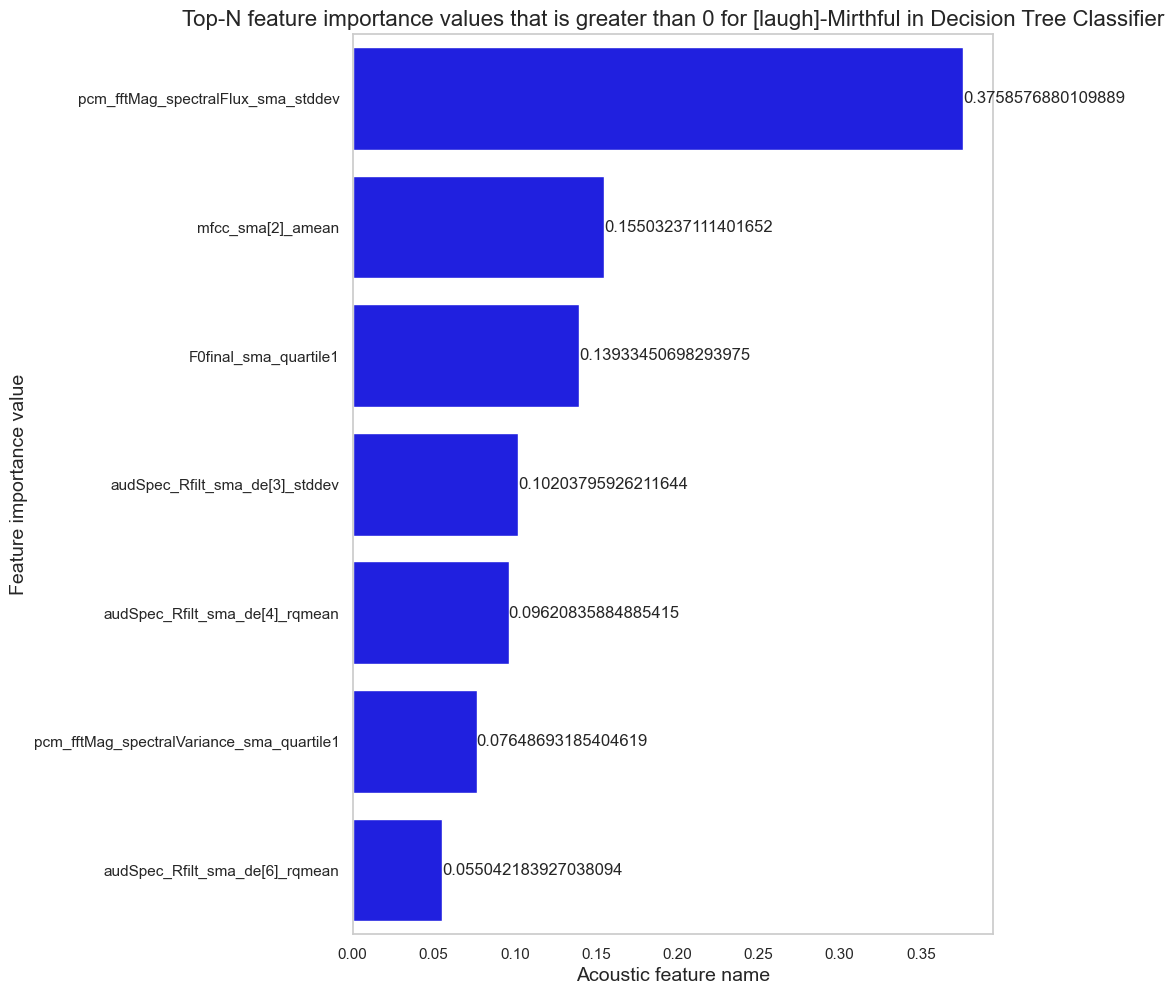

In [32]:
print("Feature importnce for acuostic feature")

    # feature imporantance calcuation
feature_importances = clf.feature_importances_

    # Create a pandas series to visualize the feature importances
importances = pd.Series(feature_importances, index=X_feature.columns)

    # Sort the features by importance
importances_sorted = importances.sort_values()
top_5_values_importance = importances_sorted.nlargest(sizeOfGreaterFeature)
list_top5_importance_value = top_5_values_importance.tolist()

topNElement = sizeOfGreaterFeature

    # Getting the index names
feature_index_names = top_5_values_importance.index
feature_index_names_list = list(feature_index_names)

lastN_features_reversedOrder = feature_index_names_list[-topNElement:]

    # -----------Plot
laughter_name = utteranceType
group_number = lastN_features_reversedOrder
num_published_venues = list_top5_importance_value
plt.figure(figsize=(8.27, 11.69))  # A4 paper size in inches (approx. 210 x 297 mm)

# Create the horizontal bar chart without grid lines, with all bars colored blue
sns.set(style="whitegrid")
sns.barplot(x=num_published_venues, y=group_number, color="blue", orient="h")
plt.grid(False)

titleName = 'Top-N feature importance values that is greater than 0 for ' + laughter_name + ' in Decision Tree Classifier'
# Add title and labels
plt.title(titleName, fontsize=16)
plt.xlabel("Acoustic feature name", fontsize=14)
plt.ylabel("Feature importance value", fontsize=14)

# Add text labels for the number of each group on each bar
for i in range(len(group_number)):
    plt.text(x=num_published_venues[i], y=i, s=str(num_published_venues[i]), ha='left', va='center',
                 fontsize=12)

saveNameImportance = 'DecisionTree-'+constnatdurationPrefix+laughter_name + '-featureImportance.png'
# Save the plot as an image
plt.savefig(saveNameImportance)


# Show the plot
plt.show()

In [33]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.01628340092374536

In [34]:
sizeOfGreaterFeature

7

#  Filling in zero before regression analysis only for varied and duration total and this code only need to run twice not more

In [35]:
X_feature_temp.fillna(0, inplace=True)

/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_715/2436762470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature_temp.fillna(0, inplace=True)


# Regression analysis 

Adopt linear regression to identify which features are significant in explaining the variance in the concise merge type(response variable).

# Confirmation parametric or non-paremtric

 ## Shapiro-Wilk test to conform normality for all features

In [36]:
import numpy as np
from scipy.stats import shapiro, normaltest
alpha=0.05
featureColumnList = {}
print_result_dict = []
shapiro_list =[]
dagostino_list =[]
for index, column_name in enumerate(X_feature_temp.columns):
    feature_list = X_feature_temp[column_name].tolist()
   
    featureColumnList[column_name] =feature_list
feature_collection =[]
for key, value in featureColumnList.items():
    current_feature_list = value
    current_feature_name = key
    
    shapiro_stat, shapiro_p = shapiro(current_feature_list)
    dagostino_stat, dagostino_p = normaltest(current_feature_list)
    shapiro_list.append(shapiro_p)
    dagostino_list.append(dagostino_p)
    if shapiro_p > alpha:
        shapiro_result = 'passes Shapiro-Wilk test'
    else:
        shapiro_result = 'fails Shapiro-Wilk test'

        
    if dagostino_p > alpha:
        dagostino_result = 'passes D\'Agostino\'s K^2 test'
    else:
        dagostino_result = 'fails D\'Agostino\'s K^2 test'
        
    print_result_dict.append( {
        'Feature name': current_feature_name,
        'Shapiro-Wilk test  result':shapiro_p,
        'Shapiro-Wilk test report': shapiro_result,
         'D\'Agostino\'s K^2 test result': dagostino_p,
        'D\'Agostino\'s K^2 test report': dagostino_result
    } )
# Convert results to a DataFrame
results_normality_df = pd.DataFrame(print_result_dict)
topNSaveName = prefixInfo+utteranceType+'-feature-NormalityTest.csv'
results_normality_df.to_csv(topNSaveName, index=True)

# Visualisation of majority feature

/Users/mingshi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
results_normality_df

Feature name  Shapiro-Wilk test  result  \
0         audspec_lengthL1norm_sma_range                        0.0   
1        audspec_lengthL1norm_sma_maxPos                        0.0   
2        audspec_lengthL1norm_sma_minPos                        0.0   
3     audspec_lengthL1norm_sma_quartile1                        0.0   
4     audspec_lengthL1norm_sma_quartile2                        0.0   
...                                  ...                        ...   
6368         mfcc_sma_de[14]_minRangeRel                        0.0   
6369     mfcc_sma_de[14]_meanRisingSlope                        0.0   
6370   mfcc_sma_de[14]_stddevRisingSlope                        0.0   
6371    mfcc_sma_de[14]_meanFallingSlope                        0.0   
6372  mfcc_sma_de[14]_stddevFallingSlope                        0.0   

     Shapiro-Wilk test report  D'Agostino's K^2 test result  \
0     fails Shapiro-Wilk test                           0.0   
1     fails Shapiro-Wilk test                           0.0   
2     fails Shapiro-Wilk test                           0.0   
3     fails Shapiro-Wilk test                           0.0   
4     fails Shapiro-Wilk test                           0.0   
...                       ...                           ...   
6368  fails Shapiro-Wilk test                           0.0   
6369  fails Shapiro-Wilk test                           0.0   
6370  fails Shapiro-Wilk test                           0.0   
6371  fails Shapiro-Wilk test                           0.0   
6372  fails Shapiro-Wilk test                           0.0   

     D'Agostino's K^2 test report  
0     fails D'Agostino's K^2 test  
1     fails D'Agostino's K^2 test  
2     fails D'Agostino's K^2 test  
3     fails D'Agostino's K^2 test  
4     fails D'Agostino's K^2 test  
...                           ...  
6368  fails D'Agostino's K^2 test  
6369  fails D'Agostino's K^2 test  
6370  fails D'Agostino's K^2 test  
6371  fails D'Agostino's K^2 test  
6372  fails D'Agostino's K^2 test  

[6373 rows x 5 columns]

In [38]:
topGreater = importanceFeatureDF_present.head(sizeOfGreaterFeature)
indexOfGreater = topGreater.index
TopNgreaterList = [str(item) for item in indexOfGreater]

In [39]:
TopNgreaterList

['pcm_fftMag_spectralFlux_sma_stddev',
 'mfcc_sma[2]_amean',
 'F0final_sma_quartile1',
 'audSpec_Rfilt_sma_de[3]_stddev',
 'audSpec_Rfilt_sma_de[4]_rqmean',
 'pcm_fftMag_spectralVariance_sma_quartile1',
 'audSpec_Rfilt_sma_de[6]_rqmean']

In [40]:
TopNgreaterList

['pcm_fftMag_spectralFlux_sma_stddev',
 'mfcc_sma[2]_amean',
 'F0final_sma_quartile1',
 'audSpec_Rfilt_sma_de[3]_stddev',
 'audSpec_Rfilt_sma_de[4]_rqmean',
 'pcm_fftMag_spectralVariance_sma_quartile1',
 'audSpec_Rfilt_sma_de[6]_rqmean']

In [41]:
selected_rows_signifent = results_normality_df[results_normality_df['Feature name'].isin(TopNgreaterList)]
topNSaveName = prefixInfo+'DecisionTree-'+utteranceType+'-significantFeature-NormalityTest.csv'
selected_rows_signifent.to_csv(topNSaveName, index=True)

# Signifciant difference for the feature in the rank list

In [42]:
desecendingList_importanceName

['pcm_fftMag_spectralFlux_sma_stddev',
 'mfcc_sma[2]_amean',
 'F0final_sma_quartile1',
 'audSpec_Rfilt_sma_de[3]_stddev',
 'audSpec_Rfilt_sma_de[4]_rqmean',
 'pcm_fftMag_spectralVariance_sma_quartile1',
 'audSpec_Rfilt_sma_de[6]_rqmean',
 'audSpec_Rfilt_sma_de[5]_minSegLen',
 'audSpec_Rfilt_sma_de[5]_percentile99.0',
 'audSpec_Rfilt_sma_de[5]_pctlrange0-1',
 'audSpec_Rfilt_sma_de[5]_stddev',
 'audSpec_Rfilt_sma_de[5]_skewness',
 'audSpec_Rfilt_sma_de[5]_kurtosis',
 'audSpec_Rfilt_sma_de[5]_meanSegLen',
 'audSpec_Rfilt_sma_de[5]_maxSegLen',
 'mfcc_sma_de[14]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[5]_segLenStddev',
 'audSpec_Rfilt_sma_de[5]_iqr1-3',
 'audSpec_Rfilt_sma_de[5]_upleveltime25',
 'audSpec_Rfilt_sma_de[5]_upleveltime50',
 'audSpec_Rfilt_sma_de[5]_upleveltime75',
 'audSpec_Rfilt_sma_de[5]_upleveltime90',
 'audSpec_Rfilt_sma_de[5]_risetime',
 'audSpec_Rfilt_sma_de[5]_leftctime',
 'audSpec_Rfilt_sma_de[5]_lpgain',
 'audSpec_Rfilt_sma_de[5]_lpc0',
 'audSpec_Rfilt_sma_de[5]_pe

In [43]:
import numpy as np
import pandas as pd

import scipy.stats as stats




# Visualize the adjancy feature 

In [44]:
import numpy as np
import pandas as pd

import scipy.stats as stats


feature_names = desecendingList_importanceName
results = []

for i in range(len(feature_names) - 1):
    feature_1 = feature_names[i]
    feature_2 = feature_names[i + 1]
    
    feature1Name = feature_1
  #  epsilon = 1e-6
  #  f_1list_modified = f_1list + epsilon
    f_1list = X_feature_temp[feature1Name].tolist()
    
    feature2Name = feature_2
    f_2list = X_feature_temp[feature2Name].tolist()
    differences = np.array(f_1list) - np.array(f_2list)
    if np.all(differences == 0):
      print("All differences are zero. Consider alternative analyses.")
      resultfromWilT = 0
      results.append({
        'Adjancey feature 1': feature_1,
        'Adjancey feature 2': feature_2,
        'P-Value': 0
        })
    else:
      resultfromWilT = stats.wilcoxon(f_1list, f_2list, zero_method='pratt')  # or 'wilcox'
      #print(resultfromWilT)
      stast, p_value  =resultfromWilT
      results.append({
        'Adjancey feature 1': feature_1,
        'Adjancey feature 2': feature_2,
        'P-Value': p_value
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
topNSaveName = varidDurationPrefix+utteranceType+'-adjaancyFeatureSignificantlist-Wilconx-Sign-Rank-test.csv'
results_df.to_csv(topNSaveName, index=True)

In [45]:
results_dict = results
results_dict_first10 = results_dict[0:10]
results_dict_first10

[{'Adjancey feature 1': 'pcm_fftMag_spectralFlux_sma_stddev',
  'Adjancey feature 2': 'mfcc_sma[2]_amean',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'mfcc_sma[2]_amean',
  'Adjancey feature 2': 'F0final_sma_quartile1',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'F0final_sma_quartile1',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[3]_stddev',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_sma_de[3]_stddev',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[4]_rqmean',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_sma_de[4]_rqmean',
  'Adjancey feature 2': 'pcm_fftMag_spectralVariance_sma_quartile1',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'pcm_fftMag_spectralVariance_sma_quartile1',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[6]_rqmean',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_sma_de[6]_rqmean',
  'Adjancey feature 2': 'audSpec_Rfilt_sma_de[5]_minSegLen',
  'P-Value': 0.0},
 {'Adjancey feature 1': 'audSpec_Rfilt_sma_de[5]_minSegLen',
  'Adjanc

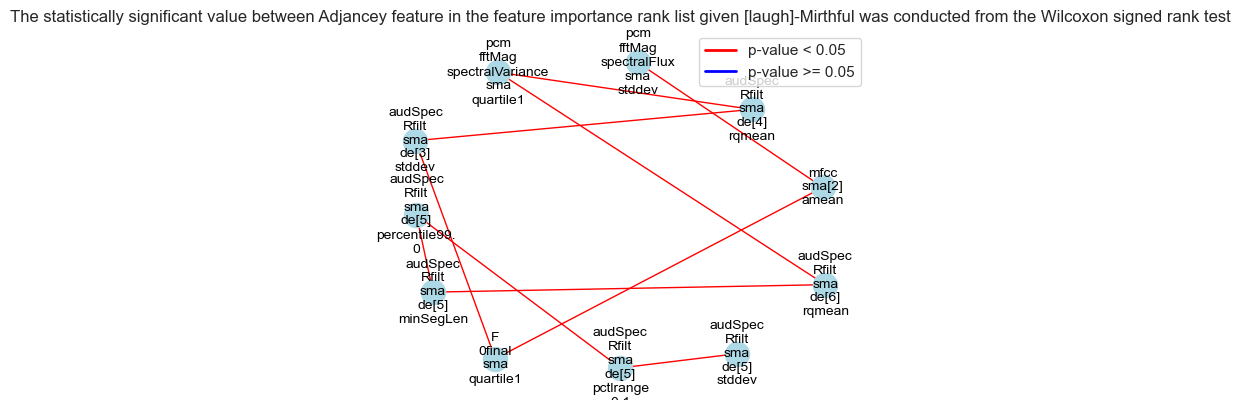

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend

# Initialize the graph
G = nx.Graph()

# Constants for column names
# Constants for column names
feature1Name = 'Adjancey feature 1'
feature2Name = 'Adjancey feature 2'
p_value_name = 'P-Value'

# Assume 'results_dict' is predefined and contains your data

for entry in results_dict_first10:
    feature1 = entry[feature1Name]
    feature2 = entry[feature2Name]
    p_value = entry[p_value_name]
  

      # Add edges with colors based on p-value
    edge_color = 'red' if p_value < 0.05 else 'blue'  # Red for significant, blue for non-significant
    G.add_edge(feature1, feature2, weight=p_value, color=edge_color)
        
    # Add edges with colors based on p-value
    edge_color = 'red' if p_value < 0.05 else 'blue'  # Red for significant, blue for non-significant
    G.add_edge(feature1, feature2, weight=p_value, color=edge_color)

# Node positions using a spring layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

# Draw edges, differentiating by color
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors)

# Draw labels for nodes
node_labels = {node: '\n'.join(node.split('_')).replace('0', '\n0') for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Add legend
legend_elements = [Line2D([0], [0], color='red', lw=2, label='p-value < 0.05'),
                   Line2D([0], [0], color='blue', lw=2, label='p-value >= 0.05')]
plt.legend(handles=legend_elements, loc='upper right')

TitleName = 'The statistically significant value between Adjancey feature in the feature importance rank list given '+utteranceType+' was conducted from the Wilcoxon signed rank test'
plt.title(TitleName)
plt.axis('off')
topNSaveName = constnatdurationPrefix+'DecisionTree-'+utteranceType+'-adjaancyFeatureGraphFeature.png'
plt.savefig(topNSaveName, format='png', bbox_inches='tight')
